# Git

## Introduction

This notebook has been automatically translated to make it accessible to more people, please let me know if you see any typos.

Git is a version control software created by Linus Torvalds, who created it in order to have a good version control when he developed the Linux kernel.

## The git areas

Git has three areas, although a fourth can also be considered.

![git states](https://maximofn.com/wp-content/uploads/2023/03/git-states.png)

 * The first one is our workspace, in it is where we have all our code. Here when we modify or create a file it becomes untracked, so we have to move it to the `staged` area.
 * The second area is the `staged` area. Here the files that we had modified or created and that were untracked become tracked, i.e. git tracks them. Here we will send the files to the following `head` area
 * The third area is the `head` area. In it we have saved a version of our code. In this way, by saving versions we can go back to past versions if necessary. The saved version of our code can be sent to a server so that it can be accessed by several people.
 * The three previous areas correspond to local work, but there is one more area and that is the `remote server`. Here what we do is to send the recorded version of our code to a server so that we have access to the code from anywhere, or more people have access to it.

To make a similarity, it is like a stage where you are going to take a photo. First you have your files modified, so you send the ones you want to immortalize to the `staged` area, that is to say to the stage. As soon as you have sent all the files you consider, you take the picture, so you send all the files to the `head` area. In this way, you can take many pictures, as the code evolves, so that you can have in a photo album the evolution of the code. Finally you can upload that photo to a server so that it is accessible by more people, that is to say, you send them to the `remote server` area.

## Install git

In most Linux distributions git is already installed, we can check it by doing `git --version`.

In [1]:
!git --version

git version 2.25.1


If you don't have it or you want to update the git version just run `sudo apt update` and then `sudo apt install git`.

In [3]:
!sudo apt update && sudo apt install git

[sudo] password for maximo.fernandez@AEROESPACIAL.SENER: 


We recheck the version

In [4]:
!git --version

git version 2.25.1


In my case I already had the latest version

## Initial configuration

### Name and mail configuration

Before starting to use git it is convenient that you make some minimum configurations like the user name and the email, this information is the one that will appear when showing who has made changes in the code. To do this you have to run


````bash
git config --global user.name "<username>"
git config --global user.email "<email>"
```

In my case I would put

````bash
git config --global user.name "MaximoFN".
git config --global user.email "maximofn@gmail.com
```

As you can see the `--global` flag what it does is to change the global git configuration, but if in a particular repository you have to put other data, you simply navigate to the repository and remove the `--global` flag from the above commands

````bash
git config user.name "<username>"
git config user.email "<email>"
```

### Configure the default editor

When we explain later what `commit`s are we will see that in one of the options we can open a browser. By default git will try to use `vim`, but since it is not a very easy editor to use we can modify it, here is how to do it with some common editors

````bash
git config --global core.editor "code" # vscode as editor
git config --global core.editor "atom" # Atom as editor
git config --global core.editor "subl" # Sublime text as editor
git config --global core.editor "nano" # Nano as editor
```

### Check git configuration

To check the git configuration we can use `git config --lits`.

In [6]:
!git config --list

user.name=maximofn
user.email=maximofn@gmail.com
user.user=maximofn
http.sslverify=true
core.repositoryformatversion=0
core.filemode=true
core.bare=false
core.logallrefupdates=true
remote.origin.url=https://github.com/maximofn/portafolio.git
remote.origin.fetch=+refs/heads/*:refs/remotes/origin/*
branch.main.remote=origin
branch.main.merge=refs/heads/main


We can use the `--global`, `--local` and `--system` flags to see only the global, local (if any) and system configuration (if any).

In [8]:
!git config --global --list

user.name=maximofn
user.email=maximofn@gmail.com
user.user=maximofn
http.sslverify=true


In [9]:
!git config --local --list

core.repositoryformatversion=0
core.filemode=true
core.bare=false
core.logallrefupdates=true
remote.origin.url=https://github.com/maximofn/portafolio.git
remote.origin.fetch=+refs/heads/*:refs/remotes/origin/*
branch.main.remote=origin
branch.main.merge=refs/heads/main


In [10]:
!git config --system --list

fatal: unable to read config file '/etc/gitconfig': No such file or directory


In my case there is no system configuration

If you only want to know the value of a configuration parameter, it would be enough to enter `git config <parameter>`.

In [15]:
!git config user.name

maximofn


## Local version control

### Initializing a new repository (`git init`)

There are two ways to initialize a new repository by making
 * One is to do `git init <repository name>`. This will create a new folder with the repository's name
 * Another is by navigating to the folder where we want to create a repository and doing `git init`.

I will create a new repository

In [1]:
!git init notebook_git

Inicializado repositorio Git vacío en /home/wallabot/Documentos/web/portafolio/posts/notebook_git/.git/


If we now do `ls` we will see that a new folder called `notebook_git` has been created.

In [3]:
!ls | grep notebook_git

notebook_git


We move to it

In [4]:
!cd notebook_git

Now inside the folder we have two ways to know that the repository has been created, one is by doing `ls -a` which will show all the files and we will see that there is a folder called `.git`. The other way is to do `git status` which will tell us the status of the repository.

In [5]:
!cd notebook_git && ls -a

.  ..  .git


In [6]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

no hay nada para confirmar (crea/copia archivos y usa "git add" para hacerles seguimiento)


As we are in a notebook, each cell has its `path` in the `path` of the notebook, that is why both times I had to do `cd notebook_git &&`, so that it changes to the folder with the repository we just created.

If I now try `git status` on another `path` where a repository has not been initialized it will give us an error

In [95]:
!cd ~/ && git status

fatal: no es un repositorio git (ni ninguno de los directorios superiores): .git


### Create new files

As soon as we have initialized a repository we can start creating new files, so let's create one and see what happens

In [7]:
!cd notebook_git && echo "print('Hello World')" > hello.py

If we now do `git status` again, we see what appears

In [8]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	hello.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


As you can see now it is telling us that the `hello.py` file is not tracked. That is to say we have to add `hello.py` to the `staged` area, which remember was like the stage where we were going to put everything that later we will take a picture of.

### Undo the creation of a new file

In this case, as they are files that git is not yet following, that is, they are not yet in the `staged` area, we would have three ways to do it

 * By simply deleting it: As git does not yet follow the file we could do `rm hello.py` and that`s it.
 * Deleting it with a git command: Earlier we deleted with `rm` but it is possible that you are on a system that does not have the `rm` command so in that case you can use the git command `git rm hello.py`.
 * Finally we can use `git clean`. This is useful for example when there are many new files, and so in a single command we delete all of them.

#### `git clean`

If we run `git clean` plain we will get an error

In [9]:
!cd notebook_git && git clean

fatal: clean.requireForce default en true y ninguno de -i, -n, ni -f entregado; rehusando el clean


It is telling us that we need to add one of these flags `-n`, `-i` and `-f`. In addition we are going to see the flag `-d`

 * `-n` (dry run): Will tell us which files will be deleted, but will not delete them.
 * `-i`: We will be asked for each file to be deleted.
 * `-f`: Will force the deletion of the files
 * `-d`: It will also delete folders.

Let's test it, first we do `git clean -n` to know which files would be deleted

In [10]:
!cd notebook_git && git clean -n

Será borrado hello.py


Now we do `git clean -f` to delete it, since we agree on deleting it

In [11]:
!cd notebook_git && git clean -f

Borrando hello.py


As we can see, you have deleted `hello.py`.

### Add a file to the staged area (`git add`)

We re-create a file

In [12]:
!cd notebook_git && echo "print('Hola mundo')" > hola.py

We do a `git status` again to verify that we have the file

In [13]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	hola.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


We see that we have the file `hola.py` but that git is not tracking it. We also see that it helps us and says `use "git add" to track them`.

The syntax is `git add <file>`, but we can do it in several ways

 * If we want to add more than one file we can do it by putting all the files we want to add to the staged area, separated by a space: `git add <file1> <file2> <file3>`.
 * If we want to add all files of the same format, for example, if we want to add all python files it would be `git add *.py`.
 * If we want to add all the files in a folder `git add <folder>/`.
 * If we want to add all the files we have three ways, `git add --all`, `git add -A` or `git add .`.

Let's add the newly created file

In [14]:
!cd notebook_git && git add hola.py

We do a `git status` to see what has happened

In [15]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Cambios a ser confirmados:
  (usa "git rm --cached <archivo>..." para sacar del área de stage)
	nuevos archivos: hola.py



As we can see it tells us that we have a new file that is being tracked and is pending confirmation `hola.py`.

### Removing a file from the staged area (`git reset`)

In case we add a file to the staged area and we want to remove it we have to use `git reset <file>`, let's see it

We create and add to the staged area a new file

In [16]:
!cd notebook_git && echo "print('Este no')" > adios.py && git add adios.py

We do `git status` to check that it is in the staged area

In [17]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Cambios a ser confirmados:
  (usa "git rm --cached <archivo>..." para sacar del área de stage)
	nuevos archivos: adios.py
	nuevos archivos: hola.py



As we can see there are `hello.py` and `adios.py`, so we use `git reset adios.py` to remove it from the staged area

In [18]:
!cd notebook_git && git reset adios.py

We do a `git status` to check that it has gone out

In [19]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Cambios a ser confirmados:
  (usa "git rm --cached <archivo>..." para sacar del área de stage)
	nuevos archivos: hola.py

Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	adios.py



We can see that `adios.py` is no longer tracked by git, it has been removed from the staged area.

We do `git clean -f` to delete it

In [20]:
!cd notebook_git && git clean -f && git status

Borrando adios.py
En la rama master

No hay commits todavía

Cambios a ser confirmados:
  (usa "git rm --cached <archivo>..." para sacar del área de stage)
	nuevos archivos: hola.py



### Commit (`git commit`)

If we go back to the similarity in which we said that the staged area was the stage where we sent the files to which we wanted to take the photo, now it is time to take the photo to immortalize the current state. This is making a `commit`.

In this way the current state of the code is recorded, so with each commit, we will have a record of the evolution of the code. As with a photo album, with each photo we have a record of the evolution of what we put on the stage.

As at the time of committing the code change is being registered, git does not let us commit if we do not make a minimal comment. So there are two ways to commit

 * git commit` in this way will open the editor we have set in the git configuration. If we have not configured a default editor, `vi` will open. If we want to change the editor configuration we can do for example `git config --global core.editor "code"` or `git config core.editor "code"` to set vscode as the default editor globally or locally.
 * `git commit -m "Commit message"`. This way we add the message directly

When doing the commit in the first way we can have a first line which will be the title of the commit and several more lines where it is explained in more detail. If we want to be able to do this with the `-m` flag it will be enough to add several `-m` flags in a row: `git commit -m "Title of the commit" -m "First line explaining more" -m "Second line explaining more"`.

Once we have made the commit, this will save a record of the change to our repository locally. We have not yet connected to a remote server

Let's try committing

In [21]:
!cd notebook_git && git commit -m "Primer commit, hola.py"

[master (commit-raíz) 1c95e4f] Primer commit, hola.py
 1 file changed, 1 insertion(+)
 create mode 100644 hola.py


We do a `git status`

In [22]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


We see that it tells us that there is nothing new, we have all our repository fully controlled.

#### Commit skipping add (`git commit -a -m` or `git commit -am`)

In the case where we want to bring all the files we have modified to the staged area and then commit them, we can do all this in one step using `git commit -a -m "message"`, `git commit --all -m "message"` or `git commit -am "message"`.

 > Note: This is only valid if a file is modified. If the file is new and git does not track it, this is not valid.

Let's see an example, let's modify `hola.py`.

In [23]:
!cd notebook_git && echo "print('He añadido una nueva linea')" >> hola.py

Let's do a `git status` to make sure

In [24]:
!cd notebook_git && git status

En la rama master
Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     hola.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


We can see that in the git help itself it already suggests us to use `git commit -a`, so we are going to do so

In [25]:
!cd notebook_git && git commit -am "Segundo commit, hola.py"

[master 6e99e73] Segundo commit, hola.py
 1 file changed, 1 insertion(+)


We return to do a `git status`.

In [26]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


There is nothing to commit, the change committee has already been made.

### Modify a file to which a commit has been made

As while we are developing we are modifying files, it is possible that in some file to which we had already made commit we modify it. In our case we are going to add a line to `hola.py`.

In [27]:
!cd notebook_git && echo "print('He añadido una tercera linea')" >> hola.py

In [28]:
!cd notebook_git && cat hola.py

print('Hola mundo')
print('He añadido una nueva linea')
print('He añadido una tercera linea')


If we do `git status` we will see that `hola.py` has modifications

In [29]:
!cd notebook_git && git status

En la rama master
Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     hola.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


### View changes in a file (`git diff <file>`)

Maybe we have been developing for a while since the last commit and we don't know what modifications we have made, for this we use `git diff <file>` which will tell us what changes we have made.

In [30]:
!cd notebook_git && git diff hola.py

diff --git a/hola.py b/hola.py
index 91dee80..fba0d22 100644
--- a/hola.py
+++ b/hola.py
@@ -1,2 +1,3 @@
 print('Hola mundo')
 print('He añadido una nueva linea')
+print('He añadido una tercera linea')


Although it is not very intuitive we can see that we have added the last line in `hola.py`.

### Undo modifications to a file (`git restore <file>`)

If we do not like the changes we have made and we want to remove them we can do `git restore <file>`.

In [31]:
!cd notebook_git && git restore hola.py

Let's see what happened with a `git status`.

In [32]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


We see that the changes in `hola.py` since the last commit have been discarded.

### Change history (`git log`)

With git we can see the history of all the changes that we have been committing, for this we use `git log`. It is as if we were reviewing our photo album.

In [33]:
!cd notebook_git && git log

commit 6e99e73cf0c5474078cc9f328ee6a54fb9ffb169 (HEAD -> master)
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:29:04 2023 +0200

    Segundo commit, hola.py

commit 1c95e4fd8388ceedee368e0121c4b0ef4900c2ac
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:28:44 2023 +0200

    Primer commit, hola.py


We can see the history of changes, read it from the bottom up.

First we see the commit with message `First commit, hello.py`, we can see the date, the author and the hash, that is its unique identifier

Next we see the second commit with message `Second commit, hello.py`, with its date, author and hash. It also shows us where the `HEAD` is and in which branch we are in.

If we use flags we can get the information in different ways, but depending on which flags we use it may be better for us, here are some useful flags:

 * `git log --oneline`: Displays commits on a single line, with the abbreviated hash and the commit message.
 * `git log --graph`: Displays a text graph of the repository history, including branches and merges.
 * `git log --decorate`: Displays the references (branches, tags, HEAD, etc.) in the log along with the commit they point to.
 * ` `git log --author="<author>"`: Filter the commit history to show only those made by a specific author.
 * ` `git log --since="<date>"`: Shows the commits made since a specific date. You can use different date formats, such as "1 week ago" or "2023-01-01".
 * ` `git log --until="<date>"`: Shows the commits made up to a specific date.
 * `git log <branch>`: Shows the commits of a specific branch.
 * `git log <commit1>..<commit2>`: Shows the commits that are in the range between two specific commits.
 * ` `git log --grep="<word>"`: Searches commit messages for a specific word or phrase.
 * `git log -p`: Shows the differences (in patch form) introduced in each commit.
 * `git log -n <n number>`: Displays the last number of commits. For example, git log -n 5 will show the last 5 commits.
 * `git log --stat`: Displays file change statistics for each commit, such as the number of lines added and removed.

For example, a convenient way to view the history is to use `git log --graph --oneline --decorate`.

In [34]:
!cd notebook_git && git log --graph --oneline --decorate

* 6e99e73 (HEAD -> master) Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


We can see that instead of giving us the whole hash it gives us only a few numbers, this is because at the moment the repository has so little history, that with those few numbers is enough, if we wanted to return to the previous point, instead of entering the whole hash (`7c448f69e30ab1b5783f5cf9ee3ae5bc362ecd4d`), entering only `7c448f6` would be enough.

We will talk about branches later, but now let's see what the `HEAD` is.

### HEAD

While developing we have been able to make changes and comment them, that is to say, we have been filling the photo album of our code. `HEAD` is the position in the album in which we are.

It is usually the last position of all commits.

If we want to know where we are we can do it by `git rev-parse HEAD`.

In [35]:
!cd notebook_git && git rev-parse HEAD

6e99e73cf0c5474078cc9f328ee6a54fb9ffb169


As you can see, the hash obtained matches the last hash obtained when doing `git log`.

In [36]:
!cd notebook_git && git log

commit 6e99e73cf0c5474078cc9f328ee6a54fb9ffb169 (HEAD -> master)
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:29:04 2023 +0200

    Segundo commit, hola.py

commit 1c95e4fd8388ceedee368e0121c4b0ef4900c2ac
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:28:44 2023 +0200

    Primer commit, hola.py


### Modify a commit (`git commit --amend`)

We may want to modify a commit, because we want to change the message, or because we want to add more files to the commit, so we will look at both cases

#### Modify the commit message

If we only want to modify the message, what we have to do is `git commit --amend -m "New message"`, let's see an example let's modify `hola.py`.

In [37]:
!cd notebook_git && echo "print('Esta es la tercera linea')" >> hola.py

We do a `git status`

In [38]:
!cd notebook_git && git status

En la rama master
Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     hola.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


Indeed we see that `hola.py` has modifications, so we make a commit with these modifications

In [39]:
!cd notebook_git && git commit -am "Tercer commot, hola.py"

[master 60e2ffd] Tercer commot, hola.py
 1 file changed, 1 insertion(+)


Let's see the commit history

In [40]:
!cd notebook_git && git log --graph --oneline --decorate

* 60e2ffd (HEAD -> master) Tercer commot, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


**Oh no! **we have written `commot` instead of `commit`, so we will modify the message

In [41]:
!cd notebook_git && git commit --amend -m "Tercer commit, hola.py"

[master c4930d7] Tercer commit, hola.py
 Date: Sun Apr 16 02:29:59 2023 +0200
 1 file changed, 1 insertion(+)


Back to the hostorial

In [42]:
!cd notebook_git && git log --graph --oneline --decorate

* c4930d7 (HEAD -> master) Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


We see that it is now well

#### Add files to the last commit

Suppose we forgot to add a file to the last commit, we simply do a `git add` with that file and do `git commit --amend -m "message"`.

We are going to create two new files

In [43]:
!cd notebook_git && echo "print('Este es el archivo 1')" > archivo1.py

In [44]:
!cd notebook_git && echo "print('Este es el archivo 2')" > archivo2.py

Now we commit only one

In [45]:
!cd notebook_git && git add archivo1.py && git commit -m "Commit con el archivo 1"

[master 285b243] Commit con el archivo 1
 1 file changed, 1 insertion(+)
 create mode 100644 archivo1.py


In [46]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo2.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


In [47]:
!cd notebook_git && git log --graph --oneline --decorate

* 285b243 (HEAD -> master) Commit con el archivo 1
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


As we can see we have left file 2 behind, so we modify the commit and add file 2

In [48]:
!cd notebook_git && git add archivo2.py

In [49]:
!cd notebook_git && git commit --amend -m "Commit con los archivos 1 y 2"

[master 04ebd1f] Commit con los archivos 1 y 2
 Date: Sun Apr 16 02:30:26 2023 +0200
 2 files changed, 2 insertions(+)
 create mode 100644 archivo1.py
 create mode 100644 archivo2.py


In [50]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


In [51]:
!cd notebook_git && git log --graph --oneline --decorate

* 04ebd1f (HEAD -> master) Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Now the last commit has the two new files

### Undo a commit (`git reset HEAD~1`)

With this command we tell git to move back one position in the commit history. There are two options `--soft` which will not erase the changes we have made and `--hard` which will.

#### Undo a commit keeping the changes (`git reset --soft HEAD~1`)

Let's create a new file

In [52]:
!cd notebook_git && echo "print('Este es el archivo 3')" > archivo3.py

We do a `git status`

In [53]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo3.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


We make a commit by adding this file

In [54]:
!cd notebook_git && git add archivo3.py && git commit -m "Commit con el archivos 3"

[master 6dc7be6] Commit con el archivos 3
 1 file changed, 1 insertion(+)
 create mode 100644 archivo3.py


In [55]:
!cd notebook_git && git log --graph --oneline --decorate

* 6dc7be6 (HEAD -> master) Commit con el archivos 3
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


We see that in the last commit there is `file3.py`, let's delete the commit keeping `file3.py`.

In [56]:
!cd notebook_git && git reset --soft HEAD~1

We now make a `git log` to see if the last commit has been deleted.

In [57]:
!cd notebook_git && git log --graph --oneline --decorate

* 04ebd1f (HEAD -> master) Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Indeed, we can see that the last commit has been deleted

We do a `git status` to see if `file3.py` has been preserved.

In [58]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo3.py



It has been maintained

#### Undo a commit discarding the changes (`git reset --hard HEAD~1`)

We have `file3.py` which we have created and we have it in the staged area

In [59]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo3.py



So we make a commit

In [60]:
!cd notebook_git && git commit -m "Commit con el archivo 3"

[master 0147d65] Commit con el archivo 3
 1 file changed, 1 insertion(+)
 create mode 100644 archivo3.py


We do a `git log` to check that there is a commit with this file

In [61]:
!cd notebook_git && git log --graph --oneline --decorate

* 0147d65 (HEAD -> master) Commit con el archivo 3
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Indeed there is a commit adding `file3.py`. Now we remove this commit by discarding `file3.py`.

In [62]:
!cd notebook_git && git reset --hard HEAD~1

HEAD está ahora en 04ebd1f Commit con los archivos 1 y 2


We make a `git log` to check that the last commit has been removed.

In [63]:
!cd notebook_git && git log --graph --oneline --decorate

* 04ebd1f (HEAD -> master) Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


The commit with `file3.py` has been removed, now we do a `git status` to check what has happened with `file3.py`.

In [64]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


There is no `file3.py` as a file to commit, let's see if it has indeed been removed completely

In [65]:
!cd notebook_git && ls | grep archivo3

Indeed, `file3.py` has been removed from the file system.

### Modify a remote commit (`git push --force`)

Although later we will see how to synchronize with remote repositories, in case you have made a commit, uploaded it to a remote repository (`git push`) and modified the commit locally (because you have modified the message or have undone the commit), to revert the changes in the remote repository you have to do `git push --force`.

 > This command modifies the history of the remote repository, so it can affect other people working with that repository, so use this command very carefully and safely. It is better to have a history of commits, in which first there is the commimt in which you have put the wrong description and then the new commit with the new description correctly put, than to go around modifying the history.

### Modify a remote commit (`git push --force-with-lease`)

If you are convinced to change the history at least use `git push --force-with-lease` which will not modify subsequent commits.

### Ignore files (`.gitignore`)

Suppose we have a file with `API key`s, this file we don`t really want to keep in the repository, because if we then share this repository, anyone would have access to these keys, so we have to tell git not to track this file

This is done with the `.gitignore` file, in which we add the path of the files or directories that we do not want git to keep track of

Let's see it

We create the file with the keys

In [66]:
!cd notebook_git && touch api_keys.py

If we make `git status` we can see that git contemplates it

In [67]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	api_keys.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


If we don't do anything, one day we may do a `git add .` and put it in the repository, so for security reasons we have to tell git not to follow this file, for that, what we do is to create the `.gitignore` adding this file

In [68]:
!cd notebook_git && echo "api_keys.py" >> .gitignore

Let's see what happens if we now do `git status`.

In [69]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	.gitignore

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


We see that git no longer supports `api_keys.py`, but it does support `.gitignore`, so we commit to add `.gitignore`.

In [70]:
!cd notebook_git && git add .gitignore && git commit -m "Añadido .gitignore"

[master 0b09cfa] Añadido .gitignore
 1 file changed, 1 insertion(+)
 create mode 100644 .gitignore


#### Which files to add to the `.gitignore`?

 * Files that have credentials or API keys (you shouldn't upload them to the repository, just inject them by environment variable)
 * Configuration folders of your editor (`/.vscode`)
 * Log files
 * System files as `.DS_Store`.
 * Folders generated with static files or compilations such as `/dist` or `/build`.
 * Dependencies that can be downloaded (`/node_modules`)
 * Coverage of testing (`/coverage`)

#### How to ignore always the same files?

If for example your IDE always generates the same configuration files, it would be nice to be able to tell git to always ignore those files, for that we create a global `.gitignore`.

In [42]:
!touch ~/.gitignore_global

In my case I am going to add the directory `__pycache__/`.

In [50]:
!echo "__pycache__/" >> ~/.gitignore_global

Now we have to tell git that this is our global `.gitignore`.

In [54]:
!git config --global core.excludesfile ~/.gitignore_global

Done, from now on the `__pycache__/` directory will always be ignored.

GitHub has a [repository](https://github.com/github/gitignore) with `.gitignore`s for many languages, I have been guided by [this one](https://github.com/github/gitignore/blob/main/Python.gitignore) for Python

### Delete a file from a commit

Let's see how to delete a file from a commit we have made. First we create two files and make them commir

In [71]:
!cd notebook_git && echo "print('Este es el archivo 4')" > archivo4.py

In [72]:
!cd notebook_git && echo "print('Este es el archivo 5')" > archivo5.py

We commit the two files

In [73]:
!cd notebook_git && git add archivo4.py archivo5.py && git commit -m "Commit con los archivos 4 y 5"

[master e3153a5] Commit con los archivos 4 y 5
 2 files changed, 2 insertions(+)
 create mode 100644 archivo4.py
 create mode 100644 archivo5.py


In [74]:
!cd notebook_git && git log --graph --oneline --decorate

* e3153a5 (HEAD -> master) Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


From here there are two options to remove a file from a commit:
 * Delete the file and create a new commit
 * Undo the commit and re-create it without the file

#### Delete the file and create a new commit

Suppose we want to delete the file `file5.py`, then we delete it with `git rm file5.py`.

In [75]:
!cd notebook_git && git rm archivo5.py

rm 'archivo5.py'


Let's do a `git status` to see what happens

In [76]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	borrados:        archivo5.py



As we can see, `file5.py` has been deleted. Now we create a new commit

In [77]:
!cd notebook_git && git commit -m "Eliminado archivo5.py"

[master ea615a9] Eliminado archivo5.py
 1 file changed, 1 deletion(-)
 delete mode 100644 archivo5.py


In [78]:
!cd notebook_git && git log --graph --oneline --decorate

* ea615a9 (HEAD -> master) Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


#### Undo the commit and create it again without the file

We re-create two files and make a commit

In [79]:
!cd notebook_git && echo "print('Este es el archivo 6')" > archivo6.py && echo "print('Este es el archivo 7')" > archivo7.py

In [80]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo6.py
	archivo7.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


In [81]:
!cd notebook_git && git add archivo6.py archivo7.py && git commit -m "Commit con los archivos 6 y 7"

[master d6dc485] Commit con los archivos 6 y 7
 2 files changed, 2 insertions(+)
 create mode 100644 archivo6.py
 create mode 100644 archivo7.py


In [82]:
!cd notebook_git && git log --graph --oneline --decorate

* d6dc485 (HEAD -> master) Commit con los archivos 6 y 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


First we undo the last commit with `git reset --soft HEAD~1`.

In [83]:
!cd notebook_git && git reset --soft HEAD~1

We do a `git status` to see what has happened.

In [84]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo6.py
	nuevos archivos: archivo7.py



We can see that the commit has been undone, but the two files are in the staged area, so to remove one of the files from the commir, we must first remove it from the staged area, to do this we do `git reset file6.py`.

In [85]:
!cd notebook_git && git reset archivo6.py

We return to do a `git status`.

In [86]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo7.py

Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo6.py



We see that `file7.py` is in the staged area, while `file6.py` is not anymore. Now we can delete file 6, for this we use `git clean`.

In [87]:
!cd notebook_git && git clean -n

Será borrado archivo6.py


In [88]:
!cd notebook_git && git clean -f

Borrando archivo6.py


We return to do a `git status`.

In [89]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo7.py



As we can see `archiv6.py` is gone, so we can make a new commit

In [90]:
!cd notebook_git && git commit -m "Commit con el archivo 7"

[master 4bb9d75] Commit con el archivo 7
 1 file changed, 1 insertion(+)
 create mode 100644 archivo7.py


In [91]:
!cd notebook_git && git log --graph --oneline --decorate

* 4bb9d75 (HEAD -> master) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


We have deleted the last commit and overwritten it with a new one, deleting the file we wanted

### History of changes to a file (`git log <file>`)

Although we have seen before how we could see the history of the repository with `git log` we may not be interested in the history of the whole repository. We may have a bug in a code file that we didn't have at the beginning, so we may want to see only the history of that file, for that we use `git log <file>`.

First we look at the files we have

In [92]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo4.py  archivo7.py  hola.py


Suppose we only want to see the changes in `hello.py`, so we do `git log hello.py`.

In [93]:
!cd notebook_git && git log --graph --oneline --decorate hola.py

* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


We can see that much less results appear than if we had done `git log`.

In [94]:
!cd notebook_git && git log --graph --oneline --decorate

* 4bb9d75 (HEAD -> master) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


### View modifications of a file at a specific point in history (`git show <hash> <file>` or `git diff <file>`)

Suppose we already know at what point a change was made to the file containing a bug, so now we want to know what changes were made to find out what might be causing the bug, we can use `git show <hash> <file>`.

Let's see what changes occurred in `hello.py` at hash `c4930d7`, i.e. when the third commit was made

In [98]:
!cd notebook_git && git show c4930d7 hola.py

commit c4930d7267c3f8df389ab0cb1bda0b5fceabb5c2
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:29:59 2023 +0200

    Tercer commit, hola.py

diff --git a/hola.py b/hola.py
index 91dee80..33bdb99 100644
--- a/hola.py
+++ b/hola.py
@@ -1,2 +1,3 @@
 print('Hola mundo')
 print('He añadido una nueva linea')
+print('Esta es la tercera linea')


The way to see the changes in git are not very intuitive, but we can see that the `print('This is the third line')` line has been added.

Another way to see changes is with `git diff`, we have two options, we can see the changes of the file at the current time with a specific point in the history, for this we do `git diff <hash> <file>`.

For example, if we want to see the changes of `hello.py` from when the first commit was made (hash `1c95e4f`) with the current situation we have to enter (`git diff 1c95e4f hello.py`)

In [99]:
!cd notebook_git && git diff 1c95e4f hola.py

diff --git a/hola.py b/hola.py
index f140969..33bdb99 100644
--- a/hola.py
+++ b/hola.py
@@ -1 +1,3 @@
 print('Hola mundo')
+print('He añadido una nueva linea')
+print('Esta es la tercera linea')


But if we want to see the difference between a specific point in the history and another specific point, we must enter the hashes of the two points in time, i.e. `git diff <hash1> <hash2> <file>`.

If we want to see the changes in `hello.py` between the second commit (hash `6e99e73`) and the first commit (hash `1c95e4f`) we would have to enter `git diff 1c95e4f 6e99e73 hello.py`.

In [101]:
!cd notebook_git && git diff 1c95e4f 6e99e73 hola.py

diff --git a/hola.py b/hola.py
index f140969..91dee80 100644
--- a/hola.py
+++ b/hola.py
@@ -1 +1,2 @@
 print('Hola mundo')
+print('He añadido una nueva linea')


The above shows us the changes of the second commit with respect to the first, but if what we want is the changes of the first commit with respect to the second, we just have to put the hashes the other way around, i.e. `git diff 6e99e73 1c95e4f hello.py`.

In [102]:
!cd notebook_git && git diff 6e99e73 1c95e4f hola.py

diff --git a/hola.py b/hola.py
index 91dee80..f140969 100644
--- a/hola.py
+++ b/hola.py
@@ -1,2 +1 @@
 print('Hola mundo')
-print('He añadido una nueva linea')


### Travel to the past (`git reset --hard <hash>` or `git reset --soft <hash>`)

Let's imagine that we have found that everything we did after generating the bug is no good and we have to rework from that point, we can go back to a position in the history by `git reset --hard <hash>` (this will not keep the changes) or `git reset --soft <hash>` (this will keep the changes).

First let's look at the history

In [103]:
!cd notebook_git && git log --graph --oneline --decorate

* 4bb9d75 (HEAD -> master) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Suppose we want to go to the time when we made the third commit (hash `c4930d7`), moreover we do it without keeping the changes, i.e. all the modifications we made afterwards will be deleted, we do `git reset --hard c4930d7`.

First we do `ls` to see the files that we have now

In [104]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo4.py  archivo7.py  hola.py


Let's go to the third commit

In [105]:
!cd notebook_git && git reset --hard c4930d7

HEAD está ahora en c4930d7 Tercer commit, hola.py


If we do `ls` we will see that we no longer have `file1.py`, `file2.py`, `file4.py`, or `file7.py`.

In [106]:
!cd notebook_git && ls

api_keys.py  hola.py


### Back to the future (`git reflog`)

Suppose we have regretted and we want to go back to where we were, to the last point in the history, one way would be to do `git reset --hard <hash>`. But let's imagine that we don't know the hash, because we didn't do `git log` before and if we do it now it only gives us history information up to the third commit.

In [107]:
!cd notebook_git && git log --graph --oneline --decorate

* c4930d7 (HEAD -> master) Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Here what we can do is `git reflog`, which will give us a history including jumps

In [108]:
!cd notebook_git && git reflog

c4930d7 (HEAD -> master) HEAD@{0}: reset: moving to c4930d7
4bb9d75 HEAD@{1}: commit: Commit con el archivo 7
ea615a9 HEAD@{2}: reset: moving to HEAD~1
d6dc485 HEAD@{3}: commit: Commit con los archivos 6 y 7
ea615a9 HEAD@{4}: commit: Eliminado archivo5.py
e3153a5 HEAD@{5}: commit: Commit con los archivos 4 y 5
0b09cfa HEAD@{6}: commit: Añadido .gitignore
04ebd1f HEAD@{7}: reset: moving to HEAD~1
0147d65 HEAD@{8}: commit: Commit con el archivo 3
04ebd1f HEAD@{9}: reset: moving to HEAD~1
6dc7be6 HEAD@{10}: commit: Commit con el archivos 3
04ebd1f HEAD@{11}: commit (amend): Commit con los archivos 1 y 2
285b243 HEAD@{12}: commit: Commit con el archivo 1
c4930d7 (HEAD -> master) HEAD@{13}: commit (amend): Tercer commit, hola.py
60e2ffd HEAD@{14}: commit: Tercer commot, hola.py
6e99e73 HEAD@{15}: commit: Segundo commit, hola.py
1c95e4f HEAD@{16}: commit (initial): Primer commit, hola.py


We can see that it tells us that we were in the commit with hash `4bb9d75`, that is the last commit we did, and from there we went to the commit with hash `c4930d7`, which if you notice, is the same hash as the commit with message `Third commit, hello.py`. So we already know the hash of the last commit, the `4bb9d75`, so to return to the position of the last commit we do `git reset --hard 4bb9d75`.

In [109]:
!cd notebook_git && git reset --hard 4bb9d75

HEAD está ahora en 4bb9d75 Commit con el archivo 7


If we now return to log

In [110]:
!cd notebook_git && git log --graph --oneline --decorate

* 4bb9d75 (HEAD -> master) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


We see that we are indeed in the position of the last commit, *we have returned to the future*.

## Branches

![branches](https://maximofn.com/wp-content/uploads/2023/04/GIT-Branchand-its-Operations.png)

The use of branches is very useful, since we can start developing a new feature without having to modify the original code.

### Create a branch (`git branch <branch name>`)

 > Note: First of all it must be said that to create a branch in a repository there must be at least one commit, if you try to create a branch before making the first commit you will receive an error.

To create a branch we use the command `git branch <branch name>`.

In [111]:
!cd notebook_git && git branch new_branch

### List branches (`git branch`)

We have created our first branch, we can check all the branches we have created by typing just `git branch`.

In [112]:
!cd notebook_git && git branch

* master
  new_branch


In addition to listing it tells us with an asterisk `*` in which branch we are in, in this case in the `master` branch.

### Rename branches, bye-bye to `master` branch (`git branch -m <old name> <new name>`)

Historically in git the main branch has been called `master`, but this has some bad historical connotations because of the `master-slave` concept, due to the suffering that many people received, so now the main branch is usually called `main`, so to change the name we use `git branch -m master main`.

In [113]:
!cd notebook_git && git branch -m master main

We list the branches

In [114]:
!cd notebook_git && git branch

* main
  new_branch


As we can see we have been able to change the name of the main branch from `master` to `main`.

### Switch branch (`git switch <branch>`)

If we want to change the branch just type `git switch <branch name>`.

In [115]:
!cd notebook_git && git switch new_branch

Cambiado a rama 'new_branch'


Let's see which branch we are in with `git branch`.

In [116]:
!cd notebook_git && git branch

  main
* new_branch


As we can see we have changed the branch to new_branch

If we want to create and switch branches in one command we can use `git switch -c <branch name>`.

In [117]:
!cd notebook_git && git switch -c new_branch2

Cambiado a nueva rama 'new_branch2'


Let's see which branch we are in

In [118]:
!cd notebook_git && git branch

  main
  new_branch
* new_branch2


We have created and switched branches with a single command

### Get the branch we are on (`git branch --show-current`)

As we have seen so far with `git branch` we can get a list of all the branches and also see the one we are currently in, but in the case that we have a lot of branches, which can happen in a team with many people, it is good to get the branch and not get a list of all of them, for that we use `git branch --show-current`.

In [119]:
!cd notebook_git && git branch --show-current

new_branch2


### List of most recent branches (`git branch --sort=-committerdate`)

In case of having many branches we may be interested in knowing which are the most recent ones to see which have been the last ones created and where should be the latest in development, for that we use `git branch --sort=-committerdate`.

In [120]:
!cd notebook_git && git branch --sort=-committerdate

* new_branch2
  new_branch
  main


As we can see, they have been arranged in reverse order to when we created them

### The deprecated command `git checkout`.

Until a while ago the command to create branches and switch between them was `git checkout`, but this command not only does this, but also restores the working directory. But this goes against the philosophy of Linux, so the `git branch`, `git swicth` and `git restore` commands were created to split this functionality.

### Merging branches (`git merge`)

As we have said, creating branches is very useful to develop new features without affecting the rest of the team. But when these are finished we have to move them to the main branch, for this we use the command `git merge <branch>`.

 > Important**: We have to be in the branch that is going to adopt the changes, i.e. if we want to merge the changes made in the `new_branch2` branch into the `main` branch, we first have to make sure we are in the `main` branch.

First we check which branch we are in

In [121]:
!cd notebook_git && git branch --show-current

new_branch2


We delete `file7.py`

In [122]:
!cd notebook_git && git rm archivo7.py

rm 'archivo7.py'


We make a commit with the changes

In [123]:
!cd notebook_git && git commit -am "Eliminado archivo7.py"

[new_branch2 5168f78] Eliminado archivo7.py
 1 file changed, 1 deletion(-)
 delete mode 100644 archivo7.py


If we do an `ls` we see that `file7.py` is no longer there.

In [124]:
!cd notebook_git && ls | grep archivo7

Create a new file and commit

In [125]:
!cd notebook_git && touch archivo8.py && git add archivo8.py && git commit -m "Commit con el archivo 8"

[new_branch2 564ccfb] Commit con el archivo 8
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 archivo8.py


We have made two new commits in this branch, let's see it with `git log`.

In [126]:
!cd notebook_git && git log --graph --oneline --decorate

* 564ccfb (HEAD -> new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch, main) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Switch to the main branch

In [127]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


If we now do `ls` again we will see that `file7.py` is indeed

In [128]:
!cd notebook_git && ls | grep archivo7

archivo7.py


Merge the branches, bring the changes from `new_branch2` to `main`.

In [129]:
!cd notebook_git && git merge new_branch2

Actualizando 4bb9d75..564ccfb
Fast-forward
 archivo7.py | 1 -
 archivo8.py | 0
 2 files changed, 1 deletion(-)
 delete mode 100644 archivo7.py
 create mode 100644 archivo8.py


We do a `git status`

In [130]:
!cd notebook_git && git status

En la rama main
nada para hacer commit, el árbol de trabajo está limpio


We can see that when doing the merge it is not necessary to do any commit, let's see with a `git log` what has happened

In [131]:
!cd notebook_git && git log --graph --oneline --decorate

* 564ccfb (HEAD -> main, new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


We see that the commit of the branch `new_branch2` has been incorporated to this branch

#### Fast-forward

In this case we create a new branch, the main one we do not touch it and we only modify the new one, making several commits. So when we merge the new one into the main one we will see all the commits that were made in the new one. To perform this type of merge we type `git merge --ff-only <branch>`.

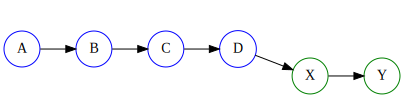

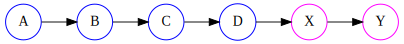

In [132]:
### This code is for creating the branch graph, it is not necessary for the course.

import graphviz

# Crear el gráfico con la dirección de las flechas de izquierda a derecha
orin = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})
fast_foward = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})

# Agregar nodos (pelotas) A, B, C y D en la rama principal
orin.node('A', shape='circle', label='A', color='blue')
orin.node('B', shape='circle', label='B', color='blue')
orin.node('C', shape='circle', label='C', color='blue')
orin.node('D', shape='circle', label='D', color='blue')
orin.node('E', shape='circle', label='', color='transparent')
fast_foward.node('A', shape='circle', label='A', color='blue')
fast_foward.node('B', shape='circle', label='B', color='blue')
fast_foward.node('C', shape='circle', label='C', color='blue')
fast_foward.node('D', shape='circle', label='D', color='blue')

# Agregar nodos (pelotas) X e Y en la rama secundaria
orin.node('X', shape='circle', label='X', color='green')
orin.node('Y', shape='circle', label='Y', color='green')
fast_foward.node('X', shape='circle', label='X', color='magenta')
fast_foward.node('Y', shape='circle', label='Y', color='magenta')

# Agregar flechas entre los nodos en la rama principal
orin.edges(['AB', 'BC', 'CD'])
orin.edge('D', 'E', color='transparent')  # Hacer la flecha de C a D transparente
fast_foward.edges(['AB', 'BC', 'CD', 'DX', 'XY'])

# Agregar flechas entre los nodos en la rama secundaria
orin.edges(['DX', 'XY'])

# Mostrar el diagrama de flujo en la celda de código de Jupyter Notebook
display(orin)
display(fast_foward)

Let's first check that we are in the main branch

In [133]:
!cd notebook_git && git branch --show-current

main


We create a new branch

In [134]:
!cd notebook_git && git branch branch_fast_forward

We switch to it

In [135]:
!cd notebook_git && git switch branch_fast_forward

Cambiado a rama 'branch_fast_forward'


In [136]:
!cd notebook_git && git branch --show-current

branch_fast_forward


Let's see the log

In [137]:
!cd notebook_git && git log --graph --oneline --decorate --all

* 564ccfb (HEAD -> branch_fast_forward, new_branch2, main) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Ok, we are in a branch created from the main branch with all its log history, we make two new commits

In [138]:
!cd notebook_git && git rm archivo4.py && git commit -am "Eliminado archivo4.py"

rm 'archivo4.py'
[branch_fast_forward 4484e70] Eliminado archivo4.py
 1 file changed, 1 deletion(-)
 delete mode 100644 archivo4.py


In [139]:
!cd notebook_git && git rm hola.py && git commit -am "Eliminado hola.py"

rm 'hola.py'
[branch_fast_forward 94149fc] Eliminado hola.py
 1 file changed, 3 deletions(-)
 delete mode 100644 hola.py


We make a new log to see that in this new branch the following have been created

In [140]:
!cd notebook_git && git log --graph --oneline --decorate

* 94149fc (HEAD -> branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2, main) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


As we can see the last two commits are the ones we have created and we can check that those commits are not in the main branch (for that I specify to do it on the `main` branch).

In [141]:
!cd notebook_git && git log main --graph --oneline --decorate

* 564ccfb (new_branch2, main) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Now we go to the `main` branch to do the merge

In [142]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


Finally we make the fast forward type merge

In [143]:
!cd notebook_git && git merge --ff-only branch_fast_forward

Actualizando 564ccfb..94149fc
Fast-forward
 archivo4.py | 1 -
 hola.py     | 3 ---
 2 files changed, 4 deletions(-)
 delete mode 100644 archivo4.py
 delete mode 100644 hola.py


The merge has been done, let's see what has happened to the log in the `main` branch

In [144]:
!cd notebook_git && git log --graph --oneline --decorate

* 94149fc (HEAD -> main, branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


As you can see, the two commits made in the `branch_fast_forward_frog have been kept.

#### No fast-forward or true merge

In this case we create a new branch, leave the main one untouched and modify the new one, making several commits. Then we make a commit in the main one. So when we merge the new one into the main one we will see a single commit in the new one. To do this kind of merge we type `git merge <branch> --no-ff`.

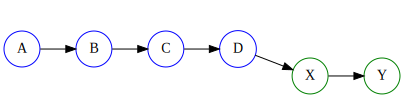

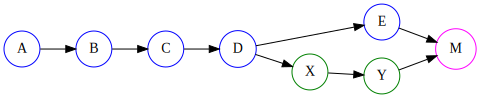

In [145]:
### This code is for creating the branch graph, it is not necessary for the course.

import graphviz

# Crear el gráfico con la dirección de las flechas de izquierda a derecha
orin = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})
not_fast_forward = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})

# Agregar nodos (pelotas) A, B, C y D en la rama principal
orin.node('A', shape='circle', label='A', color='blue')
orin.node('B', shape='circle', label='B', color='blue')
orin.node('C', shape='circle', label='C', color='blue')
orin.node('D', shape='circle', label='D', color='blue')
orin.node('E', shape='circle', label='', color='transparent')
not_fast_forward.node('A', shape='circle', label='A', color='blue')
not_fast_forward.node('B', shape='circle', label='B', color='blue')
not_fast_forward.node('C', shape='circle', label='C', color='blue')
not_fast_forward.node('D', shape='circle', label='D', color='blue')
not_fast_forward.node('E', shape='circle', label='E', color='blue')

# Agregar nodos (pelotas) X e Y en la rama secundaria
orin.node('X', shape='circle', label='X', color='green')
orin.node('Y', shape='circle', label='Y', color='green')
not_fast_forward.node('X', shape='circle', label='X', color='green')
not_fast_forward.node('Y', shape='circle', label='Y', color='green')

# Agregar nodo (pelota) M en la rama principal
not_fast_forward.node('M', shape='circle', label='M', color='magenta')

# Agregar flechas entre los nodos en la rama principal
orin.edges(['AB', 'BC', 'CD'])
orin.edge('D', 'E', color='transparent')  # Hacer la flecha de C a D transparente
not_fast_forward.edges(['AB', 'BC', 'CD', 'DE'])

# Agregar flechas entre los nodos en la rama secundaria
orin.edges(['DX', 'XY'])
not_fast_forward.edges(['DX', 'XY', 'YM'])

# Agregar flechas de la rama principal al nodo M
not_fast_forward.edge('E', 'M')

# Mostrar el diagrama de flujo en la celda de código de Jupyter Notebook
display(orin)
display(not_fast_forward)

Let's first check that we are in the main branch

In [146]:
!cd notebook_git && git branch --show-current

main


We create a new branch

In [147]:
!cd notebook_git && git branch branch_no_fast_forward

We switch to it

In [148]:
!cd notebook_git && git switch branch_no_fast_forward

Cambiado a rama 'branch_no_fast_forward'


In [149]:
!cd notebook_git && git branch --show-current

branch_no_fast_forward


Ok, we are in a branch created from the main branch with all its log history, we make two new commits

In [150]:
!cd notebook_git && touch file1 && git add file1 && git commit -m "file1"

[branch_no_fast_forward e4e23c9] file1
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 file1


In [151]:
!cd notebook_git && touch file2 && git add file2 && git commit -m "file2"

[branch_no_fast_forward 8df3429] file2
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 file2


We make a new log to see that in this new branch the following have been created

In [152]:
!cd notebook_git && git log --graph --oneline --decorate

* 8df3429 (HEAD -> branch_no_fast_forward) file2
* e4e23c9 file1
* 94149fc (main, branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


As we can see the last two commits are the ones we have created and we can check that those commits are not in the main branch (for that I specify to do it on the `main` branch).

In [153]:
!cd notebook_git && git log main --graph --oneline --decorate

* 94149fc (main, branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Now we go to the `main` branch

In [154]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


We create a new commit

In [155]:
!cd notebook_git && touch file3 && git add file3 && git commit -m "file3"

[main 8bdf4d8] file3
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 file3


Finally we make the merge of type no fast forward

In [152]:
!cd notebook_git && git merge branch_no_fast_forward --no-ff

ommit. comenzando con '#' serán ignoradas, y un mensaje vacío abortasaria esta># especialmente si esto fusiona un upstream actualizado en una rama de tópico. /home/wallabot/Documentos/web/portafolio/posts/notebook_git/.git/MERGE_MSG   [ línea 1/7 (14%), col 1/48 (2%), car 0/301 (0%) ]             [ Párrafo justificado ]...llabot/Documentos/web/portafolio/posts/notebook_git/.git/MERGE_MSG Modificado

As we can see, it opens the editor to enter a commit message and a default message. We accept the message and see what has happened

In [156]:
!cd notebook_git && git status

En la rama main
nada para hacer commit, el árbol de trabajo está limpio


In [157]:
!cd notebook_git && git log --graph --oneline --decorate

*   274529c (HEAD -> main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


In [158]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo8.py  file1  file2  file3


As we can see a new commit has been created with the changes of the new branch in the main branch

#### Squash

In this type of merge, all commits of a new branch are merged into one commit in the main branch, for this we type `git merge <branch> --squash`.

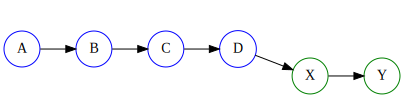

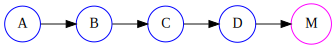

In [159]:
### This code is for creating the branch graph, it is not necessary for the course.

import graphviz

# Crear el gráfico con la dirección de las flechas de izquierda a derecha
orin = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})
squash = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})

# Agregar nodos (pelotas) A, B, C y D en la rama principal
orin.node('A', shape='circle', label='A', color='blue')
orin.node('B', shape='circle', label='B', color='blue')
orin.node('C', shape='circle', label='C', color='blue')
orin.node('D', shape='circle', label='D', color='blue')
orin.node('E', shape='circle', label='', color='transparent')
squash.node('A', shape='circle', label='A', color='blue')
squash.node('B', shape='circle', label='B', color='blue')
squash.node('C', shape='circle', label='C', color='blue')
squash.node('D', shape='circle', label='D', color='blue')

# Agregar nodos (pelotas) X e Y en la rama secundaria
orin.node('X', shape='circle', label='X', color='green')
orin.node('Y', shape='circle', label='Y', color='green')

# Agregar nodo (pelota) M en la rama principal
squash.node('M', shape='circle', label='M', color='magenta')

# Agregar flechas entre los nodos en la rama principal
orin.edges(['AB', 'BC', 'CD'])
orin.edge('D', 'E', color='transparent')  # Hacer la flecha de C a D transparente
squash.edges(['AB', 'BC', 'CD', 'DM'])

# Agregar flechas entre los nodos en la rama secundaria
orin.edges(['DX', 'XY'])

# Mostrar el diagrama de flujo en la celda de código de Jupyter Notebook
display(orin)
display(squash)

Let's first check that we are in the main branch

In [160]:
!cd notebook_git && git branch --show-current

main


We create a new branch

In [161]:
!cd notebook_git && git branch branch_squash

We switch to it

In [162]:
!cd notebook_git && git switch branch_squash

Cambiado a rama 'branch_squash'


In [163]:
!cd notebook_git && git branch --show-current

branch_squash


Let's see the log

In [164]:
!cd notebook_git && git log --graph --oneline --decorate --all

*   274529c (HEAD -> branch_squash, main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Ok, we are in a branch created from the main branch with all its log history, we do three new commits

In [165]:
!cd notebook_git && git rm file1 && git commit -am "Eliminado file1"

rm 'file1'
[branch_squash 767b632] Eliminado file1
 1 file changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file1


In [166]:
!cd notebook_git && git rm file2 && git commit -am "Eliminado file2"

rm 'file2'
[branch_squash a47f771] Eliminado file2
 1 file changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file2


In [167]:
!cd notebook_git && git rm file3 && git commit -am "Eliminado file3"

rm 'file3'
[branch_squash 85f8c9f] Eliminado file3
 1 file changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file3


We make a new log to see that in this new branch the following have been created

In [168]:
!cd notebook_git && git log --graph --oneline --decorate

* 85f8c9f (HEAD -> branch_squash) Eliminado file3
* a47f771 Eliminado file2
* 767b632 Eliminado file1
*   274529c (main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


As we can see the last three commits are the ones we have created and we can check that those commits are not in the main branch (for that I specify to do it on the `main` branch).

In [169]:
!cd notebook_git && git log main --graph --oneline --decorate

*   274529c (main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Now we go to the `main` branch to do the merge

In [170]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


We make a squash merge

In [171]:
!cd notebook_git && git merge branch_squash --squash

Actualizando 274529c..85f8c9f
Fast-forward
Commit de aplastamiento -- no actualizando HEAD
 file1 | 0
 file2 | 0
 file3 | 0
 3 files changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file1
 delete mode 100644 file2
 delete mode 100644 file3


The merge has been done, let's see what has happened to the log in the `main` branch

In [172]:
!cd notebook_git && git log --graph --oneline --decorate

*   274529c (HEAD -> main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


The changes made in the branch do not appear, let's do a `git status`.

In [173]:
!cd notebook_git && git status

En la rama main
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	borrados:        file1
	borrados:        file2
	borrados:        file3



We see that we have to commit with the merge. This is because git doesn't know what message to put in it and leaves it up to us to do it, so we do it.

In [174]:
!cd notebook_git && git commit -m "Merge squash de los commits de la rama branch_squash"

[main 52acb97] Merge squash de los commits de la rama branch_squash
 3 files changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file1
 delete mode 100644 file2
 delete mode 100644 file3


We redo a `git log`.

In [175]:
!cd notebook_git && git log --graph --oneline --decorate

* 52acb97 (HEAD -> main) Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


### Merging conflicts

When merging branches it can happen that the same file has been modified in several branches. This can be normal in projects where several people are developing, so let's see how to solve this problem.

#### We create a conflict

We check that we are in the branch `main`.

In [176]:
!cd notebook_git && git branch --show-current

main


Create a new branch from this one

In [177]:
!cd notebook_git && git branch rama_con_conflicto

We add a line to the file `file1.py`, remember that we are in the `main` branch

In [178]:
!cd notebook_git && echo "print('rama main')" >> archivo1.py

In [179]:
!cd notebook_git && cat archivo1.py

print('Este es el archivo 1')
print('rama main')


file1.py` is modified, we make a commit

In [180]:
!cd notebook_git && git add archivo1.py && git commit -m "archivo1.py en rama main"

[main 53f909b] archivo1.py en rama main
 1 file changed, 1 insertion(+)


Now we go to the branch `branch_with_conflict` and add a new line to `file1.py`.

In [181]:
!cd notebook_git && git switch rama_con_conflicto

Cambiado a rama 'rama_con_conflicto'


In [182]:
!cd notebook_git && git branch --show-current

rama_con_conflicto


In [183]:
!cd notebook_git && echo "print('rama rama_con_conflicto')" >> archivo1.py

In [184]:
!cd notebook_git && cat archivo1.py

print('Este es el archivo 1')
print('rama rama_con_conflicto')


As we can see `file1.py` is not the same in the `main` branch and in the `branch_with_conflict` branch. We make a commit with the modification of `file1.py` in the branch `branch_with_conflict`.

In [185]:
!cd notebook_git && git add archivo1.py && git commit -m "archivo1.py en rama rama_con_conflicto"

[rama_con_conflicto 32851c3] archivo1.py en rama rama_con_conflicto
 1 file changed, 1 insertion(+)


Back to the `main` branch

In [186]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


In [187]:
!cd notebook_git && git branch --show-current

main


We make a merge of the branch `branch_with_conflict`.

In [188]:
!cd notebook_git && git merge rama_con_conflicto

Auto-fusionando archivo1.py
CONFLICTO (contenido): Conflicto de fusión en archivo1.py
Fusión automática falló; arregle los conflictos y luego realice un commit con el resultado.


When doing the merge, it warns us that there is a conflict in `file1.py` and that the merge could not be done. We do a `git status`

In [189]:
!cd notebook_git && git status

En la rama main
Tienes rutas no fusionadas.
  (arregla los conflictos y ejecuta "git commit"
  (usa "git merge --abort" para abortar la fusion)

Rutas no fusionadas:
  (usa "git add <archivo>..." para marcar una resolución)
	modificados por ambos:  archivo1.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


It tells us the same thing, but it gives us more information, it tells us that we can abort the merge with `git merge --abort`. But let's fix it instead

#### Resolving a conflict

In our case we know where the problem is, but in case we don't know it, using `git diff` we can find the problem

In [190]:
!cd notebook_git && git diff archivo1.py

diff --cc archivo1.py
index 8b4bf58,b5c003c..0000000
--- a/archivo1.py
+++ b/archivo1.py
@@@ -1,2 -1,2 +1,6 @@@
  print('Este es el archivo 1')
++<<<<<<< HEAD
 +print('rama main')
++=======
+ print('rama rama_con_conflicto')
++>>>>>>> rama_con_conflicto


git diff is telling us that the problem is in the last line. The version of the `HEAD` branch file (the one we are currently `main` in) has `print('branch main`)` on the last line, while the `branch_with_conflict` version has `print('branch_with_conflict`)` on the last line. So you have to open the file with any editor and fix this.

After editing the file with my code editor I have removed all the extra lines and it looks like this

In [192]:
!cd notebook_git && cat archivo1.py

print('Este es el archivo 1')
print('rama main')

Now we do a `git status` to see what we need to do

In [193]:
!cd notebook_git && git status

En la rama main
Tienes rutas no fusionadas.
  (arregla los conflictos y ejecuta "git commit"
  (usa "git merge --abort" para abortar la fusion)

Rutas no fusionadas:
  (usa "git add <archivo>..." para marcar una resolución)
	modificados por ambos:  archivo1.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


It tells us that we have the file `file1.py` with modifications, so we add it to the `staged` area and then commit it.

In [194]:
!cd notebook_git && git add archivo1.py && git commit -m "archivo1.py con el merge resuelto"

[main 679bb49] archivo1.py con el merge resuelto


We do a `git status` again to see if it has been resolved.

In [195]:
!cd notebook_git && git status

En la rama main
nada para hacer commit, el árbol de trabajo está limpio


It seems to have been solved, we make a `git log` to check it.

In [196]:
!cd notebook_git && git log --graph --oneline --decorate

*   679bb49 (HEAD -> main) archivo1.py con el merge resuelto
|\  
| * 32851c3 (rama_con_conflicto) archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


### Remove branches

The idea of a branch is to open it to develop a new functionality or feature in a way that does not affect the rest of the development team. Therefore when this is achieved it is merged with the main branch. So after the merge it doesn't make sense to keep the branch anymore so it has to be deleted, but it will be done in a different way if the branch has been merged or not with the main branch.

#### Delete branches that have been merged (`git branch -d <branch>`)

To delete a branch that has already been merged with the main branch just do `git branch -d <branch>` or `git branch --delete <branch>`. Let's delete the last branch that we have created and merged

In [197]:
!cd notebook_git && git branch -d rama_con_conflicto

Eliminada la rama rama_con_conflicto (era 32851c3).


If we now list all branches we can see that we will no longer have `branch_with_conflict`.

In [198]:
!cd notebook_git && git branch

  branch_fast_forward
  branch_no_fast_forward
  branch_squash
* main
  new_branch
  new_branch2


#### Remove branches that have not been merged with the main branch (`git brnach -D <branch>`)

If we try to do the same as before with a branch that has never been merged with another we will get an error

We are going to create a new branch, we are going to commit it and we are not going to merge it.

In [199]:
!cd notebook_git && git branch branch_sin_fusion

In [200]:
!cd notebook_git && git switch branch_sin_fusion

Cambiado a rama 'branch_sin_fusion'


In [201]:
!cd notebook_git && touch file4 && git add file4 && git commit -m "file4"

[branch_sin_fusion 9506b0a] file4
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 file4


In [202]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


With everything we have learned so far, we can see that what we have done is to create a new branch, switch to it, create a new file, commit it and go back to the `main` branch. Now let's try to delete this new branch

In [203]:
!cd notebook_git && git branch -d branch_sin_fusion

error: La rama 'branch_sin_fusion' no ha sido fusionada completamente.
Si estás seguro de querer borrarla, ejecuta 'git branch -D branch_sin_fusion'.


As we can see it tells us that `branch_sin_fusion` has not been merged so it has not been removed and that if we are sure to remove it we have to do `git branch -D branch_sin_fusion`, so we do it to remove it

In [204]:
!cd notebook_git && git branch -D branch_sin_fusion

Eliminada la rama branch_sin_fusion (era 9506b0a).


Now it has been eliminated

## Working with remote repositories

When we develop software we do not usually do it alone, we usually work as a team, so it does not make sense to have a local git repository, but to have a remote repository with which we all work and share the progress.

 > Note: The goal of this post is to explain git. For the connection with remote repositories I will explain it with GitHub because it is the most used git repository hosting service, but I will not go deep into GitHub.

### Clone a remote repository (`git clone <repository>`)

If we start working on a repository that has already been created, the first thing we have to do is to clone it, for this we have to do is `git clone <repository>`, where `<repository>` can be a URL or a SSH address. As right now the whole topic of the language model grnades and ChatGPT are very fashionable, we are going to clone an opensource repository created by the community, [Open-Assistant](https://github.com/LAION-AI/Open-Assistant), for this we will do `git clone https://github.com/LAION-AI/Open-Assistant`.

In [11]:
!git clone https://github.com/LAION-AI/Open-Assistant.git

Clonando en 'Open-Assistant'...
remote: Enumerating objects: 29769, done.
remote: Counting objects: 100% (673/673), done.
remote: Compressing objects: 100% (310/310), done.
remote: Total 29769 (delta 398), reused 577 (delta 354), pack-reused 29096
Recibiendo objetos: 100% (29769/29769), 33.61 MiB | 29.29 MiB/s, listo.
Resolviendo deltas: 100% (19967/19967), listo.


This creates the `Open-Assistant` folder with all the code from the repository, we can enter inside and see all the code

In [13]:
!cd Open-Assistant && ls

ansible		 deploy		      model	      safety
assets		 discord-bots	      notebooks       scripts
backend		 docker		      oasst-data      setup.cfg
CODEOWNERS	 docker-compose.yaml  oasst-shared    text-frontend
CONTRIBUTING.md  docs		      pyproject.toml  website
copilot		 inference	      README.md
data		 LICENSE	      redis.conf


I delete the folder

In [ ]:
!rm -r Open-Assistant

### Linking a local repository to a remote repository

If it happens the other way around, if we first start developing locally and then we want to synchronize it with a remote repository we have to do the following

 * First create an empty remote repository, in my case I created the `notebook_git` repository on GitHub which I will later delete.
 * Get repository URL, or SSH address
 * Synchronize them using `git remote add origin <URL>.

The empty repository I created on GitHub looks like this

notebook git repo](https://maximofn.com/wp-content/uploads/2023/04/notebook_git_repo.png)

In my case I will use the SSH address which is `git@github.com:maximofn/notebook_git.git`.

In [205]:
!cd notebook_git && git remote add origin git@github.com:maximofn/notebook_git.git

They are already linked, but to make sure we can do `git remote -v`.

In [206]:
!cd notebook_git && git remote -v

origin	git@github.com:maximofn/notebook_git.git (fetch)
origin	git@github.com:maximofn/notebook_git.git (push)


### Uploading changes from a local repository to a remote repository (`git push`)

As we have said they are linked, but if I go to my repository on GitHub it still looks like this

notebook git repo](https://maximofn.com/wp-content/uploads/2023/04/notebook_git_repo.png)

The local and remote repository are linked, but now we have to send all the changes from the local repository to the remote one, for this we would have to use `git push origin <local branch>:<remote branch>`, that is, as our main branch is called `main` and the main branch in GitHub is called `main` we would have to do `git push origin main:main`.
If you remember git by default called the main branch `master`, but GitHub by default calls the main branch `main` so if each person calls in his local repository to his branches in a way you have to specify which branch in local writes to which branch in remote

You can set up the default connection between branches in git by doing `git push --set-upstream origin main`. This establishes a relationship between the local branch `main` and the remote branch `main`. Once this relationship is established, it is only necessary to do `git push` to upload the changes made locally to the remote server.

So we establish the connection between branches

In [207]:
!cd notebook_git && git push --set-upstream origin main

Enumerando objetos: 51, listo.
Contando objetos: 100% (51/51), listo.
Compresión delta usando hasta 12 hilos
Comprimiendo objetos: 100% (38/38), listo.
Escribiendo objetos: 100% (51/51), 4.21 KiB | 2.11 MiB/s, listo.
Total 51 (delta 18), reusado 0 (delta 0)
remote: Resolving deltas: 100% (18/18), done.
To github.com:maximofn/notebook_git.git
 * [new branch]      main -> main
Rama 'main' configurada para hacer seguimiento a la rama remota 'main' de 'origin'.


Now we can do just `git push` to upload the local changes to the remote repository

In [208]:
!cd notebook_git && git push

Everything up-to-date


If we now go back to our GitHub repository it looks like this

![notebook git repo push](https://maximofn.com/wp-content/uploads/2023/04/notebook_git_repo_push.png)

If we do an `ls` on our local repository we can see that the files we have in the remote repository are in the local repository, that is, we have synchronized the local and remote repository.

In [209]:
!cd notebook_git && ls -a

.  ..  api_keys.py  archivo1.py  archivo2.py  archivo8.py  .git  .gitignore


The only ones that are not in the remote repository are `api_keys.py`, which is the one we added to the `.gitignore` file, that is, the one we told git not to follow. And `.git` which is where the configuration of our local repository is and that does not have to be uploaded to the remote repository, because each person will have its own git configuration and therefore it does not have to be synchronized.

### Download changes from a remote repository to a local repository (`git pull`)

Now we are going to do the other way around, we are going to download the new changes that have been made in the remote repository. If we look at how the remote repository is we can see that there is a button that says `Add a README`, so we click it to add it.

![notebook git repo push](https://maximofn.com/wp-content/uploads/2023/04/notebook_git_repo_push.png)

When we hit it, an editor will open, we leave what GitHub has put and save the changes by clicking on the `Commit changes...` button.

![noteboot git repo readme](https://maximofn.com/wp-content/uploads/2023/04/notebook_git_repo_readme.png)

A window will pop up asking for a commit message, leave the default one and click on `Comit changes`.

![notebook git git repo commit message](https://maximofn.com/wp-content/uploads/2023/04/notebook_git_repo_commit_message.png)

By doing so, the repository will look like this

![notebook git repo pull](https://maximofn.com/wp-content/uploads/2023/04/notebook_git_repo_pull.png)

A new file named `README.MD` has been created, but if we do `ls` in the local repository we won't find it

In [10]:
!cd notebook_git && ls | grep README

So we have to pull the changes from the remote repository to the local repository, for this we have to do `git pull origin <remote branch>` to tell git on which remote branch we are going to pull the data, but as before we can establish a relationship between the remote branch and the local branch in the following way `git branch --set-upstream-to=origin/<local branch> <remote branch>`, but as our local branch is called `main` and the remote branch GitHub calls it `main` we should change the above by `git branch --set-upstream-to=origin/main main`.

Once this is done, to download the new changes from the remote repository to the local repository you would only have to do `git pull`.

Let's set the relationship between branches with `git branch --set-upstream-to=origin/main main`.

In [210]:
!cd notebook_git && git branch --set-upstream-to=origin/main main

Rama 'main' configurada para hacer seguimiento a la rama remota 'main' de 'origin'.


Now we can pull the changes from the remote repository to the local repository with `git pull`.

In [211]:
!cd notebook_git && git pull

remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
Desempaquetando objetos: 100% (3/3), 646 bytes | 646.00 KiB/s, listo.
Desde github.com:maximofn/notebook_git
   679bb49..527e07a  main       -> origin/main
Actualizando 679bb49..527e07a
Fast-forward
 README.md | 1 +
 1 file changed, 1 insertion(+)
 create mode 100644 README.md


As we can see it says `README.md` has been added, we check it by doing `ls`.

In [212]:
!cd notebook_git && ls | grep README

README.md


We have the file in local

### Synchronize remote and local branches

As we have seen we had to synchronize the remote and local branches in order to upload and download the data, however, if we first create the repository in GitHub and then clone it, this synchronization is no longer necessary.

## Aliases

Every time we have wanted to make a log we have used this command `git log --graph --oneline --decorate`, however remembering this command is quite complicated, in fact I do not remember it, every time I wanted to use it I had to look it up because I did not remember it, so it would be nice to have a way to abbreviate it.

For this git offers `alias`, so you can create aliases of the commands you want, for this you have to do `git config --global alias.<alias name> "command"`.

So let's call `git tree` to the command `git log --graph --oneline --decorate`, since it allows us to see the history, with the branching and merging of branches as if it were the growth of a tree, so we do `git config --global alias.tree "log --graph --oneline --decorate"`.

 **Important**: Do not put the word `git` inside the command.

In [218]:
!git config --global alias.tree "log --graph --oneline --decorate"

If we now go to our repository and do `git tree` we will see the history as we did before

In [217]:
!cd notebook_git && git tree

* 527e07a (HEAD -> main, origin/main) Create README.md
*   679bb49 archivo1.py con el merge resuelto
|\  
| * 32851c3 archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


As we can see, our alias has been created

### Aliases of existing git commands

You can create aliases for commands that already exist in git, in fact, it's a practice that many people use, especially for shortcuts, so let's make one. Let's make an alias of the `git status` command and rename it to `git st` like this `git config --global alias.st "status"`.

In [219]:
!git config --global alias.st "status"

We test it now

In [220]:
!cd notebook_git && git st

En la rama main
Tu rama está actualizada con 'origin/main'.

nada para hacer commit, el árbol de trabajo está limpio


We already have the `git status` command simplified to `git st`.

### Non-git command aliases

We can create aliases for non git commands, for example, because we think git needs that new command, it is done the same way with the exception that the command has to be preceded by `!`, i.e. it would be `git config --global alias.<alias name> "!command"`.

When we have seen the conflicts, we have seen that git told us where they were, but to solve them we have to edit the code ourselves, so we can create a git alias so that we can open a file with the text editor we want, in my case I will create an alias that will open the files with `vscode` for that I have to do `git config --global alias.code "!code"`.

In [222]:
!git config --global alias.code "!code"

We tested it

In [223]:
!cd notebook_git && git code README.md

After doing this, I have opened `README.md` in `vscode`.

### List with all aliases

In case we do not remember the aliases we have created we can see the global configuration of git, but as this can be a bit overwhelming because it gives us a lot of information, we can filter to show us only the aliases we have created, for this we use `git config --get-regexp ^alias

In [224]:
!git config --get-regexp ^alias\.

alias.tree log --graph --oneline --decorate
alias.st status
alias.code !code


We obtain the alais we have created

But even better, we can create an alias to get the aliases, to do this we do `git config --global alias.alias "config --get-regexp ^alias.

In [225]:
!git config --global alias.alias "config --get-regexp ^alias\."

If we now make `git alias`

In [226]:
!git alias

alias.tree log --graph --oneline --decorate
alias.st status
alias.code !code
alias.alias config --get-regexp ^alias\.


We get the list with all our aliases

## Stash (`git stash`)

Suppose we are working on a branch, we have several modified files, we have not committed, and for whatever reason we have to move to another branch. For example, we are in a branch developing a new feature, and we have to leave it halfway because there is a critical bug in the main branch.

One solution would be to make a commit to save the changes and come back later. But maybe we have left the code half done and we don't want to commit it. So that's why the stash was invented, which is like a storage, where you leave your code stored so that you can retrieve it later.

It is a stack, which means that the last thing in is the first thing out.

Let's see how to do it, first we create a new branch that we will call `new_feature`.

In [2]:
!cd notebook_git && git branch new_feature

We switch to it

In [3]:
!cd notebook_git && git switch new_feature

Cambiado a rama 'new_feature'


Let's modify `file2.py` and `file8.py`.

In [4]:
!cd notebook_git && echo "print('new_feature')" >> archivo2.py && echo "print('new_feature')" >> archivo8.py

We do a `git status` to check that the changes have been made.

In [5]:
!cd notebook_git && git status

En la rama new_feature
Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     archivo2.py
	modificados:     archivo8.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


Let's put `file8.py` to the `staged` area

In [6]:
!cd notebook_git && git add archivo8.py

We return to do a `git status`.

In [7]:
!cd notebook_git && git status

En la rama new_feature
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	modificados:     archivo8.py

Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     archivo2.py



As we can see we have two modified files, of which one of them is also in the `staged` area. If now we were to change the branch, in order not to lose the changes we could do a commit, or save them in the `stash` storage, so we are going to do the latter using `git stash`.

In [8]:
!cd notebook_git && git stash

Directorio de trabajo y estado de índice WIP on new_feature: 527e07a Create README.md guardados


If we now redo `git status` let's see what happens

In [9]:
!cd notebook_git && git status

En la rama new_feature
nada para hacer commit, el árbol de trabajo está limpio


The files with modifications no longer appear, it is as if we had made a commit.

 > Important**: Newly created files, which have never been tracked by git will not go to the repository, so with new files it is necessary to at least do a `git add` first.

If I now create a new file and try to take it to the warehouse, it will give me an error

In [16]:
!cd notebook_git && touch archivo9.py

In [11]:
!cd notebook_git && git status

En la rama new_feature
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo9.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


In [13]:
!cd notebook_git && git stash

No hay cambios locales para guardar


In [14]:
!cd notebook_git && git status

En la rama new_feature
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo9.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


As we can see `file9.py` has not saved it in the repository, so it should have been added with `git add`.

In [15]:
!cd notebook_git && rm archivo9.py

### Everything to stash (`git stash -u -a`)

As we have seen only files that git is tracking are sent to the store, but if we have new files created, or ignored files, they will not be sent, so to solve this we can use the `-u` or `--include-untracked` flags to send the new files that git has not yet tracked, and the `-a` or `--all` flag to include everything, even the ignored files.

### List of stashes (`git stash list`)

As we have said the stash acts as a stack, so if we make use of this stash many times, we will actually have a list of storages, and to see the ones we have stored we can use `git stash list`.

In [17]:
!cd notebook_git && git stash list

stash@{0}: WIP on new_feature: 527e07a Create README.md


As we can see we only have one, which indicates the branch (`on new_feature`), the last commit (`Create README.md`) and an identifier (`527e07a`).

### Store with description (`git stash push -m <description>)`)

As we have seen, the list returns the branch and the last commit, but this information is only useful to know from where we have started to modify before saving in the history. It also returns an identifier that does not tell us much, so we can add a first description to the stash with `git stash push -m <description>`.

First we do a `git status` to see what we have uncommitted

In [18]:
!cd notebook_git && git status

En la rama new_feature
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo9.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


We have `file9.py`, but remember that it has never been tracked by git, so to include it in a stash we have to use the `-u` flag or the `-a` flag, so we create a new stash with a description with the command `git stash push -u -m <description>`.

In [28]:
!cd notebook_git && git stash push -u -m "archivo9.py"

Directorio de trabajo y estado de índice On new_feature: archivo9.py guardados


We take out the stash list

In [29]:
!cd notebook_git && git stash list

stash@{0}: On new_feature: archivo9.py
stash@{1}: WIP on new_feature: 527e07a Create README.md


The new one appears much more clearly

### Retrieve the last stash (`git stash pop`)

As we have said, the stash is a stack with stores, so when it comes to retrieving them, we will do it just like a stack, always retrieving the last one.

![git stash push pop](https://maximofn.com/wp-content/uploads/2023/04/git-stash-push-pop.png)

To retrieve the last stash we have to do `git stash pop`.

First we do a `git status` to check that we do not have any pending changes.

In [30]:
!cd notebook_git && git status

En la rama new_feature
nada para hacer commit, el árbol de trabajo está limpio


Now we recover the last stash

In [31]:
!cd notebook_git && git stash pop

En la rama new_feature
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo9.py

Descartado refs/stash@{0} (0246b0e922f654e7fc68cfeaf26e24fc511feb37)


If we do git status again we will see that we have `file9.py` pending a commit.

In [32]:
!cd notebook_git && git status

En la rama new_feature
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo9.py



And if we check the stash list, we have only one stash left

In [33]:
!cd notebook_git && git stash list

stash@{0}: WIP on new_feature: 527e07a Create README.md


### Delete a stash (`git stash drop <position>`)

If we want to delete a stash we have to do `git stash drop <position>` where `<position>` is the position of the stash in the list.

We obtain the list of the stash

In [34]:
!cd notebook_git && git stash list

stash@{0}: WIP on new_feature: 527e07a Create README.md


In our case we only have ones and in position 0 (`stash@{0}`), so to remove it we would have to do `git stash drop 0`, however I am not going to do it because I am going to remove it later with another command

### Remove all stashes (`git stash clear`)

If we want to clear the entire stash list we have to do `git stash clear`.

In [35]:
!cd notebook_git && git stash clear

If we now ask for the stash list

In [36]:
!cd notebook_git && git stash list

We get nothing because we have eliminated all

Let's leave everything as it was, we do a `git status` to remember the changes we had pending

In [37]:
!cd notebook_git && git status

En la rama new_feature
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo9.py



We see that we are in the `new_feature` branch and that we have `file9.py` pending a commit, as we have created it for the example we delete it and return to the main branch

In [39]:
!cd notebook_git && git reset archivo9.py

In [41]:
!cd notebook_git && rm archivo9.py

In [42]:
!cd notebook_git && git switch main

Cambiado a rama 'main'
Tu rama está actualizada con 'origin/main'.


## Tags

When we are developing code there come moments when we generate versions, for example `v1.1`, `v1.2`, etc. To keep this under control git provides us with tags.

### Create a new tag (`git tag -a <tag_name> -m "<message>"`)

To create a tag we have to do `git tag -a <tag_name> -m "<message>"`.

For example, let's create a tag in the current version of the repository, for this I will do `git tag -a v_tag -m "Tag with the repository in the final part, where we explain the tags"`.

In [1]:
!cd notebook_git && git tag -a v_tag -m "Tag con el repositorio en la parte final, en la que explicamos los tags"

### List of tags (`git tag`)

To see the tags we have created we can do `git tag`.

In [2]:
!cd notebook_git && git tag

v_tag


### Create a tag from an old commit (`git tag -a <tag_name> -m "<message>" <hash>`)

Let's do a `git tree` to see the history

In [3]:
!cd notebook_git && git tree

* 527e07a (HEAD -> main, tag: v_tag, origin/main, new_feature) Create README.md
*   679bb49 archivo1.py con el merge resuelto
|\  
| * 32851c3 archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Although it does not say it in the description, when we made the commit `4bb9d75` was when we finished the version control part locally, so it would also be nice to have a tag of that moment. To do so, what we have to do is to create a tag adding the hash of that point in time

In [4]:
!cd notebook_git && git tag -a v_local -m "Tag con el repositorio en la parte de control de versiones de manera local" 4bb9d75

If we now make a list of the tags, the new one appears.

In [5]:
!cd notebook_git && git tag

v_local
v_tag


And if we look at the commit history

In [8]:
!cd notebook_git && git tree

* 527e07a (HEAD -> main, tag: v_tag, origin/main, new_feature) Create README.md
*   679bb49 archivo1.py con el merge resuelto
|\  
| * 32851c3 archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (tag: v_local, new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


In the history point where we have created the tag, now appears the tag we have created `* 4bb9d75 (tag: v_local, new_branch) Commit with file 7`.

### Switching between tags (`git reset --hard <tag>` or `git reset --soft <tag>`)

Just as we can move between different commits in the history, we can also move between tags. This has the advantage that we can move to another time in the history without having to know the hash, with knowing the name of the tag that we have put in that moment we can move simply doing `git reset --hard <tag>` or `git reset --soft <tag>`.

First we are going to do an `ls` to see the files that we have

In [6]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo8.py  README.md


We also make a `git tree` to see where we are in the history of the project

In [7]:
!cd notebook_git && git tree

* 527e07a (HEAD -> main, tag: v_tag, origin/main, new_feature) Create README.md
*   679bb49 archivo1.py con el merge resuelto
|\  
| * 32851c3 archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (tag: v_local, new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Now we change to the point where we have created the `v_local` tag by `git reset --hard v_local`.

In [10]:
!cd notebook_git && git reset --hard v_local

HEAD está ahora en 4bb9d75 Commit con el archivo 7


If we now redo an `ls` we see that we do not have the same files.

In [11]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo4.py  archivo7.py  hola.py


If we also look at the history, we can see that we have changed the time of the history.

In [12]:
!cd notebook_git && git tree

* 4bb9d75 (HEAD -> main, tag: v_local, new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


To go back to the last history point in time, as we have also created a tag, it will be enough to do `git reset --hard v_tag`.

In [13]:
!cd notebook_git && git reset --hard v_tag

HEAD está ahora en 527e07a Create README.md


We go back to the history to check that we have returned to the last moment in history

In [14]:
!cd notebook_git && git tree

* 527e07a (HEAD -> main, tag: v_tag, origin/main, new_feature) Create README.md
*   679bb49 archivo1.py con el merge resuelto
|\  
| * 32851c3 archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (tag: v_local, new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py
